In [1]:
# Set-up
%matplotlib inline
import matplotlib.pyplot as plt

# Python add-ons
import numpy as np
import pandas as pd

# 1. Variability metrics validation

In [2]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

VM = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    VM['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/variability/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    VM['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/variability/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 1.1. Sky conditions

<Figure size 640x480 with 0 Axes>

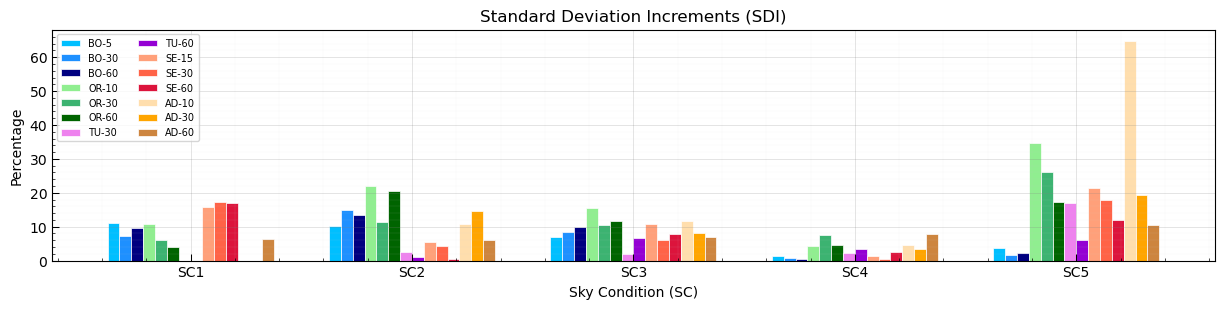

<Figure size 640x480 with 0 Axes>

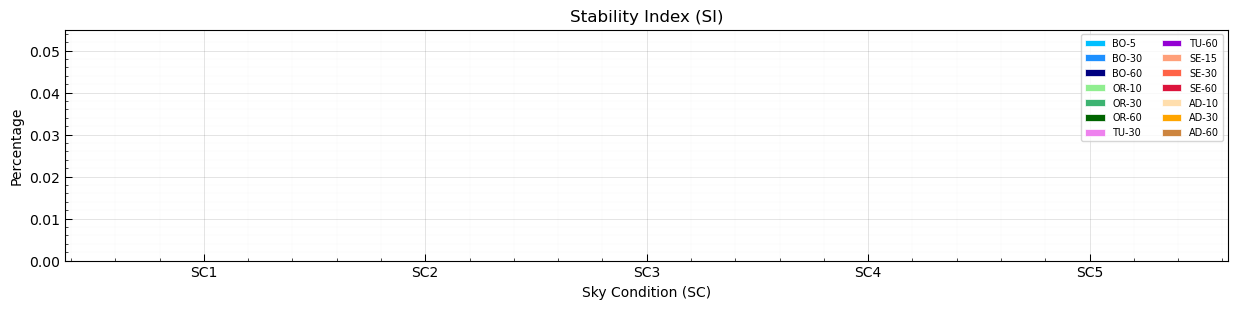

<Figure size 640x480 with 0 Axes>

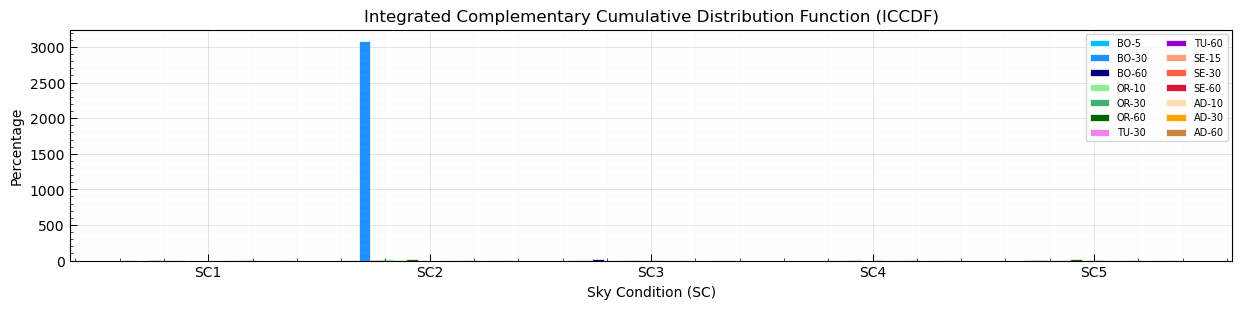

<Figure size 640x480 with 0 Axes>

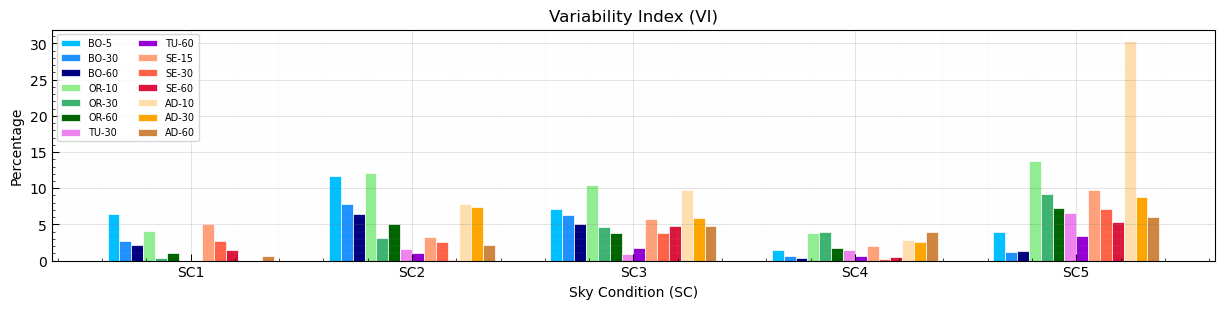

In [3]:
hor = 15
ver = 3

labels = []
colors = []

for i in FILE:
    # Labels
    a = i.split(sep='-')[0][0:2].upper()
    b = i.split(sep='-')[1]

    labels.append(f'{a}-{b}')

    # Colors
    if a == 'BO':
        if b == '30':
            colors.append('dodgerblue')
        elif b == '60':
            colors.append('navy')
        else:
            colors.append('deepskyblue')
    elif a == 'OR':
        if b == '30':
            colors.append('mediumseagreen')
        elif b == '60':
            colors.append('darkgreen')
        else:
            colors.append('lightgreen')
    elif a == 'TU':
        if b == '30':
            colors.append('violet')
        else:
            colors.append('darkviolet')
    elif a == 'SE':
        if b == '30':
            colors.append('tomato')
        elif b == '60':
            colors.append('crimson')
        else:
            colors.append('lightsalmon')
    else:
        if b == '30':
            colors.append('orange')
        elif b == '60':
            colors.append('peru')
        else:
            colors.append('navajowhite')

for i in ['standard_deviation_increments', 'stability_index', 'iccdf', 'variability_index']:
    if i == 'standard_deviation_increments':
        n = 'a'
        fig_title = f'Standard Deviation Increments (SDI)'
    elif i == 'stability_index':
        n = 'b'
        fig_title = 'Stability Index (SI)'
    elif i == 'iccdf':
        n = 'c'
        fig_title = 'Integrated Complementary Cumulative Distribution Function (ICCDF)'
    else:
        n = 'd'
        fig_title = 'Variability Index (VI)'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

    for j in FILE:
        df.loc[j] = VM['BOOTSTRAP_SC'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Sky Condition (SC)')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig12{n}.pdf', dpi=300, bbox_inches='tight')

In [4]:
df.astype(dtype=float).describe()

,SC1,SC2,SC3,SC4,SC5
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.914286,5.157143,5.342857,1.878571,8.142857
std,2.093160,3.826168,2.631383,1.377388,7.248736
min,0.000000,0.100000,0.900000,0.200000,1.200000
25%,0.100000,2.300000,4.000000,0.700000,4.325000
50%,1.250000,4.150000,4.900000,1.600000,6.850000
75%,2.700000,7.700000,6.200000,2.825000,9.100000
max,6.500000,12.100000,10.500000,4.000000,30.400000


In [5]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,3.8,4.7,1.7,3.5,5.0
std,3.1,3.0,1.9,2.5,3.6
min,0.7,1.0,0.0,0.5,0.0
25%,1.3,3.8,1.1,2.6,2.9
50%,2.7,4.6,1.3,2.7,5.9
75%,6.3,5.0,1.3,4.8,7.4
max,7.8,9.2,5.0,7.1,8.8


## 1.2. Months

<Figure size 640x480 with 0 Axes>

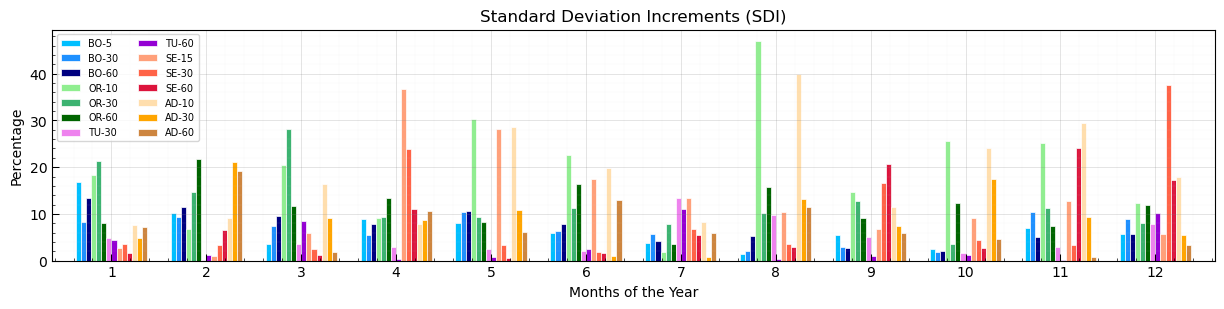

<Figure size 640x480 with 0 Axes>

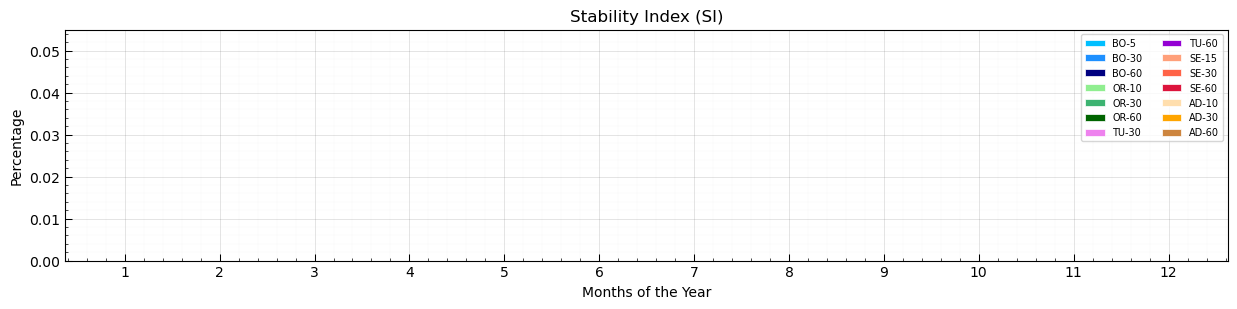

<Figure size 640x480 with 0 Axes>

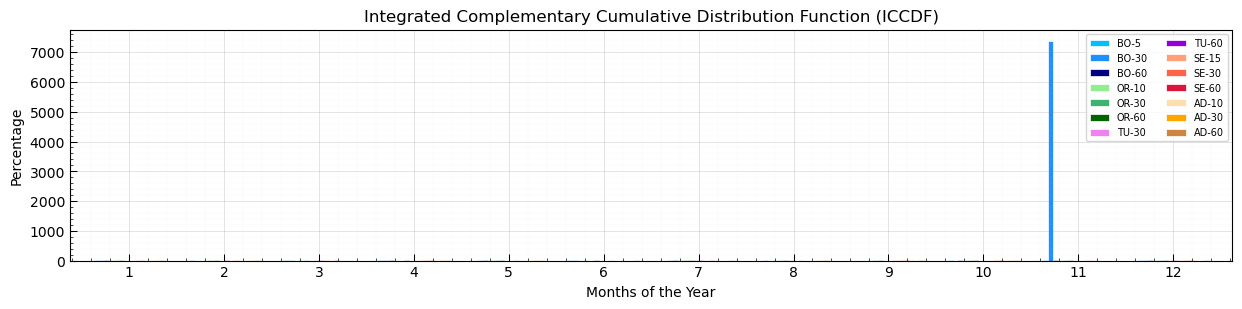

<Figure size 640x480 with 0 Axes>

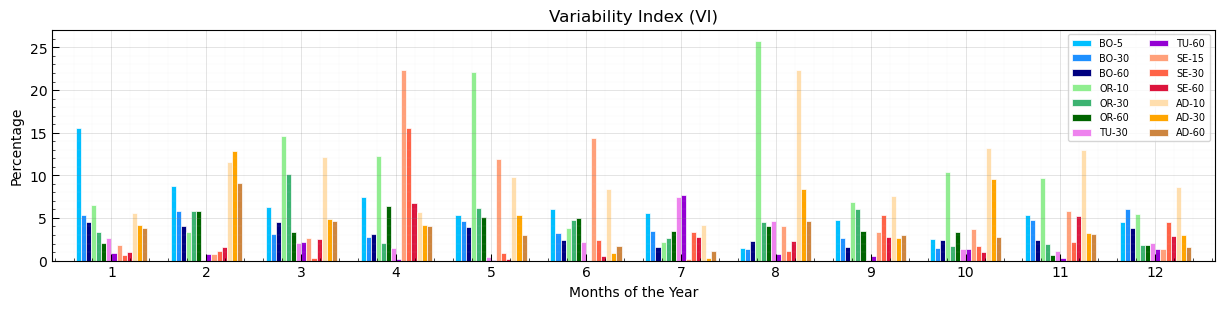

In [6]:
for i in ['standard_deviation_increments', 'stability_index', 'iccdf', 'variability_index']:
    if i == 'standard_deviation_increments':
        n = 'a'
        fig_title = f'Standard Deviation Increments (SDI)'
    elif i == 'stability_index':
        n = 'b'
        fig_title = 'Stability Index (SI)'
    elif i == 'iccdf':
        n = 'c'
        fig_title = 'Integrated Complementary Cumulative Distribution Function (ICCDF)'
    else:
        n = 'd'
        fig_title = 'Variability Index (VI)'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

    for j in FILE:
        df.loc[j] = VM['BOOTSTRAP_MONTH'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Months of the Year')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig13{n}.pdf', dpi=300, bbox_inches='tight')

In [7]:
df.astype(dtype=float).describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,4.142857,5.100000,5.235714,6.750000,5.635714,3.985714,3.307143,6.271429,3.642857,4.042857,4.192857,3.492857
std,3.776183,4.182197,4.189659,6.125577,5.880163,3.780081,2.342735,7.841451,2.261965,3.956633,3.558622,2.149585
min,0.700000,0.100000,0.300000,0.200000,0.100000,0.000000,0.200000,0.800000,0.100000,1.000000,0.300000,1.300000
25%,1.875000,1.225000,2.525000,2.875000,1.425000,1.825000,1.750000,1.700000,2.625000,1.550000,1.975000,1.800000
50%,3.600000,4.900000,3.900000,4.950000,4.850000,2.800000,3.100000,4.050000,3.200000,2.450000,3.150000,2.950000
75%,5.100000,8.050000,5.950000,7.325000,6.000000,4.950000,4.025000,4.600000,5.250000,3.625000,5.275000,4.500000
max,15.600000,12.800000,14.600000,22.300000,22.100000,14.400000,7.700000,25.800000,7.600000,13.200000,13.000000,8.600000


In [8]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,3.8,4.8,1.7,3.5,5.0
std,1.3,2.4,2.0,4.0,3.2
min,1.5,1.8,0.2,0.9,1.1
25%,3.0,3.2,0.6,1.6,3.0
50%,4.0,4.6,1.2,2.4,4.2
75%,4.6,6.1,1.8,3.0,6.1
max,5.8,10.1,7.6,15.6,11.6


# 2. Statistical distribution validations

In [9]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

SD = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    SD['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/statistical/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    SD['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/statistical/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 2.1. Sky conditions

<Figure size 640x480 with 0 Axes>

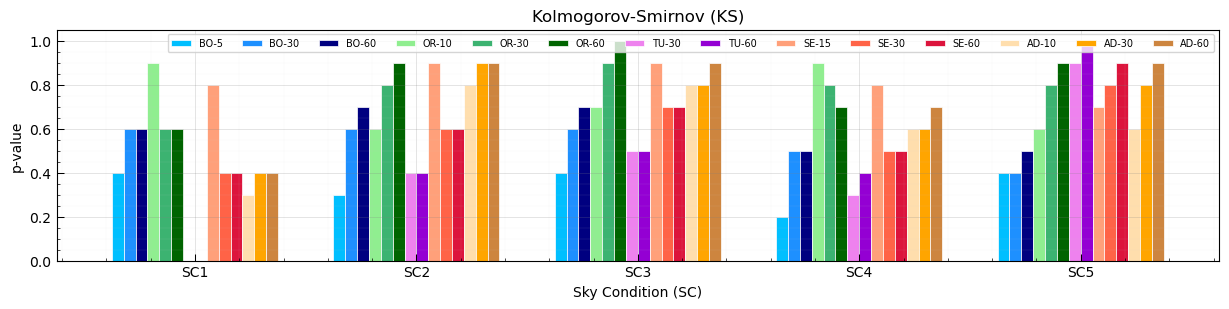

<Figure size 640x480 with 0 Axes>

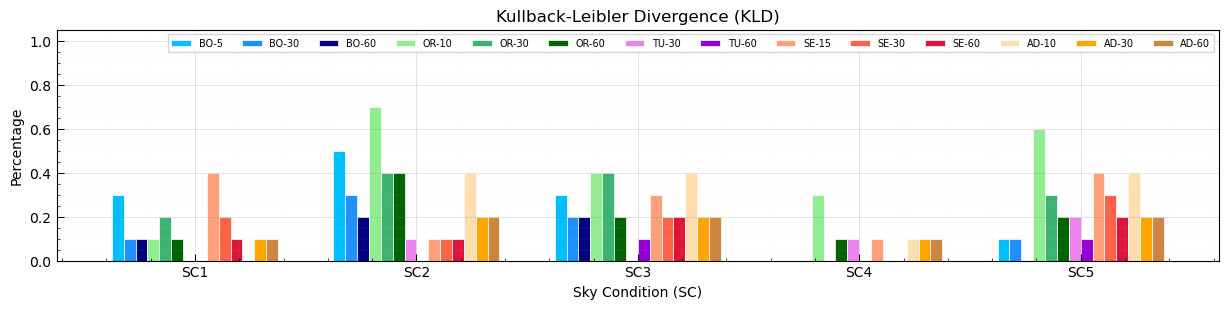

<Figure size 640x480 with 0 Axes>

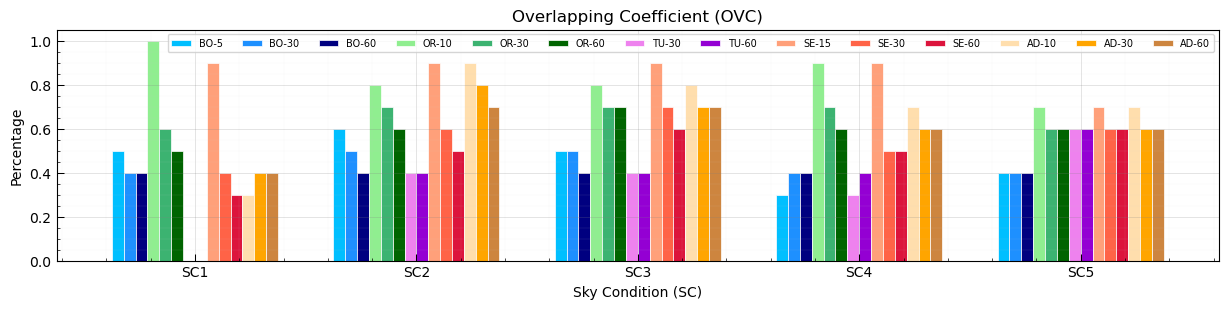

In [10]:
for i in ['kolmogorov_smirnov', 'kullback_leibler_divergence', 'overlapping_coefficient']:
    if i == 'kolmogorov_smirnov':
        n = 'a'
        fig_title = f'Kolmogorov-Smirnov (KS)'
        fig_ylabel = 'p-value'
    elif i == 'kullback_leibler_divergence':
        n = 'b'
        fig_title = 'Kullback-Leibler Divergence (KLD)'
        fig_ylabel = 'Percentage'
    else:
        n = 'c'
        fig_title = 'Overlapping Coefficient (OVC)'
        fig_ylabel = 'Percentage'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

    for j in FILE:
        df.loc[j] = SD['BOOTSTRAP_SC'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel(fig_ylabel)
    plt.xlabel('Sky Condition (SC)')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=14) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig16{n}.pdf', dpi=300, bbox_inches='tight')

In [11]:
df.astype(dtype=float).describe()

,SC1,SC2,SC3,SC4,SC5
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.435714,0.628571,0.628571,0.557143,0.578571
std,0.276258,0.177281,0.163747,0.194992,0.105090
min,0.000000,0.400000,0.400000,0.300000,0.400000
25%,0.325000,0.500000,0.500000,0.400000,0.600000
50%,0.400000,0.600000,0.700000,0.550000,0.600000
75%,0.500000,0.775000,0.700000,0.675000,0.600000
max,1.000000,0.900000,0.900000,0.900000,0.700000


In [12]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,0.4,0.7,0.4,0.6,0.6
std,0.1,0.1,0.2,0.1,0.1
min,0.4,0.6,0.0,0.4,0.4
25%,0.4,0.6,0.4,0.5,0.6
50%,0.4,0.7,0.4,0.6,0.6
75%,0.5,0.7,0.4,0.6,0.7
max,0.5,0.7,0.6,0.7,0.8


## 2.2. Months

<Figure size 640x480 with 0 Axes>

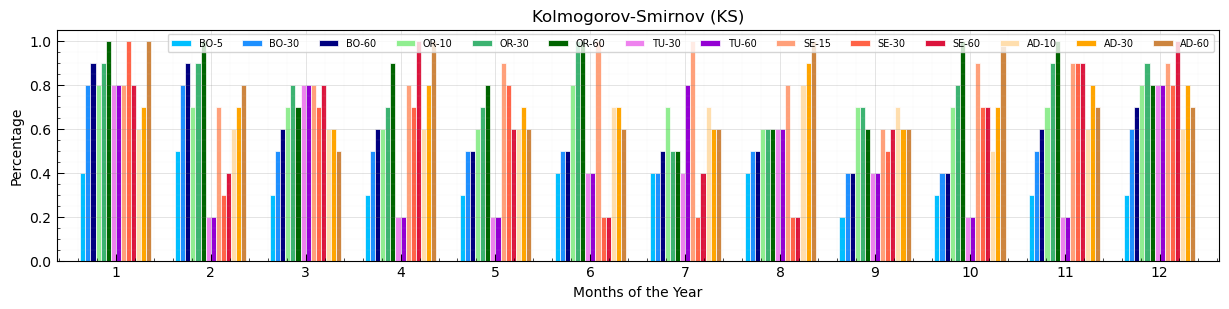

<Figure size 640x480 with 0 Axes>

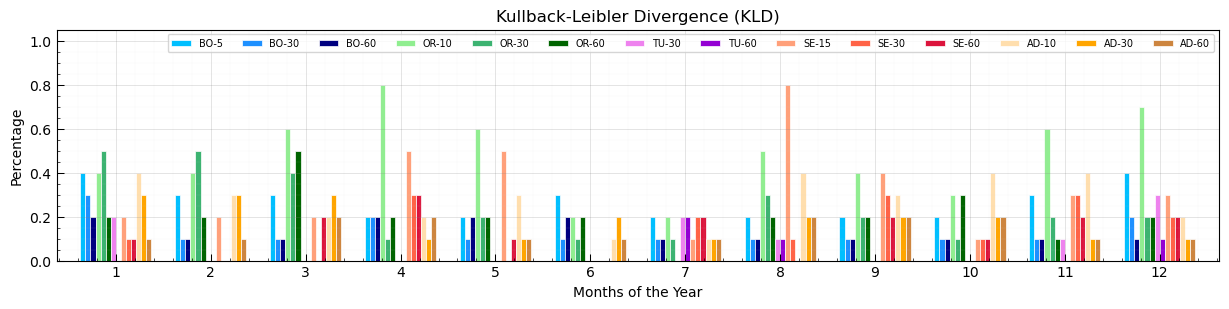

<Figure size 640x480 with 0 Axes>

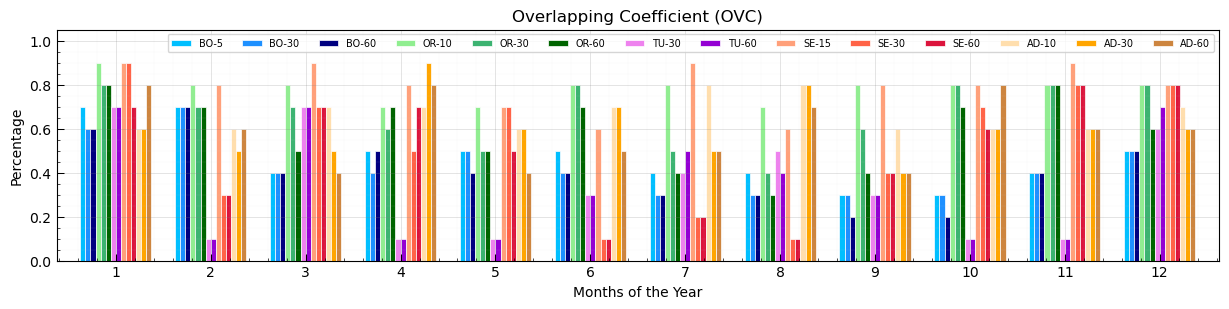

In [13]:
for i in ['kolmogorov_smirnov', 'kullback_leibler_divergence', 'overlapping_coefficient']:
    if i == 'kolmogorov_smirnov':
        n = 'a'
        fig_title = f'Kolmogorov-Smirnov (KS)'
        fig_ylabel = 'p-value'
    elif i == 'kullback_leibler_divergence':
        n = 'b'
        fig_title = 'Kullback-Leibler Divergence (KLD)'
        fig_ylabel = 'Percentage'
    else:
        n = 'c'
        fig_title = 'Overlapping Coefficient (OVC)'
        fig_ylabel = 'Percentage'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

    for j in FILE:
        df.loc[j] = SD['BOOTSTRAP_MONTH'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Months of the Year')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=14) #, bbox_to_anchor=(1, 1))
    plt.savefig(f'../figs/fig17{n}.pdf', dpi=300, bbox_inches='tight')

In [14]:
df.astype(dtype=float).describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.735714,0.542857,0.607143,0.571429,0.485714,0.492857,0.478571,0.457143,0.442857,0.528571,0.578571,0.664286
std,0.115073,0.244050,0.168543,0.243148,0.191581,0.236852,0.219014,0.234404,0.186936,0.270124,0.263639,0.121574
min,0.600000,0.100000,0.400000,0.100000,0.100000,0.100000,0.200000,0.100000,0.200000,0.100000,0.100000,0.500000
25%,0.625000,0.350000,0.425000,0.500000,0.425000,0.325000,0.325000,0.300000,0.300000,0.300000,0.400000,0.600000
50%,0.700000,0.650000,0.700000,0.650000,0.500000,0.500000,0.450000,0.400000,0.400000,0.600000,0.600000,0.650000
75%,0.800000,0.700000,0.700000,0.700000,0.600000,0.700000,0.500000,0.675000,0.550000,0.775000,0.800000,0.800000
max,0.900000,0.800000,0.900000,0.900000,0.700000,0.800000,0.900000,0.800000,0.800000,0.800000,0.900000,0.800000


In [15]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,0.4,0.7,0.3,0.5,0.6
std,0.1,0.1,0.2,0.3,0.1
min,0.3,0.4,0.1,0.1,0.4
25%,0.3,0.6,0.1,0.3,0.6
50%,0.4,0.7,0.3,0.7,0.6
75%,0.5,0.8,0.5,0.7,0.6
max,0.7,0.8,0.7,0.9,0.8


# 3. Energy production validation

In [16]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

EM = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    EM['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/energy/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    EM['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/energy/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 3.1. Sky conditions

<Figure size 640x480 with 0 Axes>

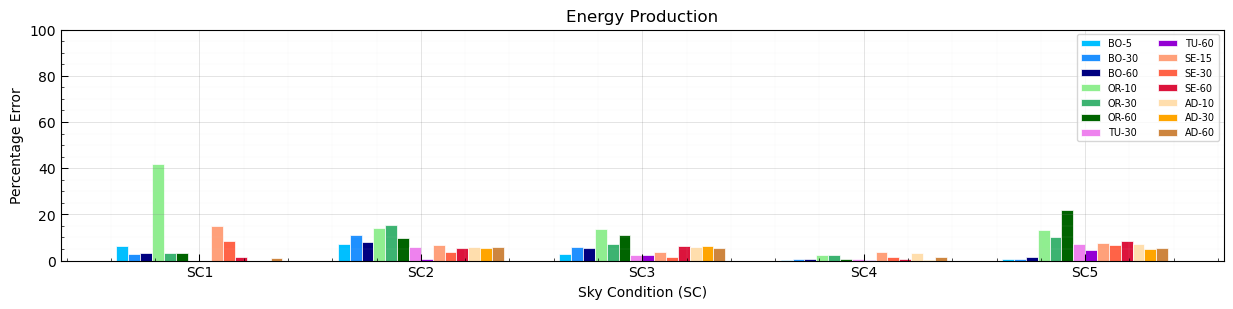

In [17]:
fig_title = 'Energy Production'
fig_ylabel = 'Percentage Error'

# pd.DataFrame
df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

for j in FILE:
    df.loc[j] = EM['BOOTSTRAP_SC'][j]['percentage_error'].values

df.index = labels

plt.figure()

df.T.plot(kind='bar',
            color=colors,
            edgecolor='white',
            linewidth=0.5,
            width=0.75,
            label=labels,
            figsize=(hor,ver))

plt.title(fig_title)
plt.ylabel(fig_ylabel)
plt.xlabel('Sky Condition (SC)')
plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(0, 100)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
plt.tight_layout
plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
plt.savefig(f'../figs/fig19a.pdf', dpi=300, bbox_inches='tight')

In [18]:
df.astype(dtype=float).describe()

,SC1,SC2,SC3,SC4,SC5
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,6.200000,7.528571,5.728571,1.342857,7.100000
std,11.052393,3.966480,3.328531,1.127089,5.599863
min,0.000000,0.700000,1.700000,0.200000,0.500000
25%,0.300000,5.575000,3.050000,0.525000,4.500000
50%,3.050000,6.300000,5.600000,0.700000,6.800000
75%,5.425000,9.325000,6.275000,2.150000,8.325000
max,41.900000,15.500000,13.600000,3.600000,22.100000


In [19]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,3.6,8.9,2.4,5.4,3.7
std,3.1,5.7,2.3,2.7,2.8
min,0.6,2.3,0.0,1.7,0.0
25%,0.7,3.3,0.4,3.8,1.5
50%,3.4,11.2,2.5,5.5,5.4
75%,5.5,13.2,3.4,7.5,5.8
max,7.9,14.3,5.8,8.3,6.0


## 3.2. Months

<Figure size 640x480 with 0 Axes>

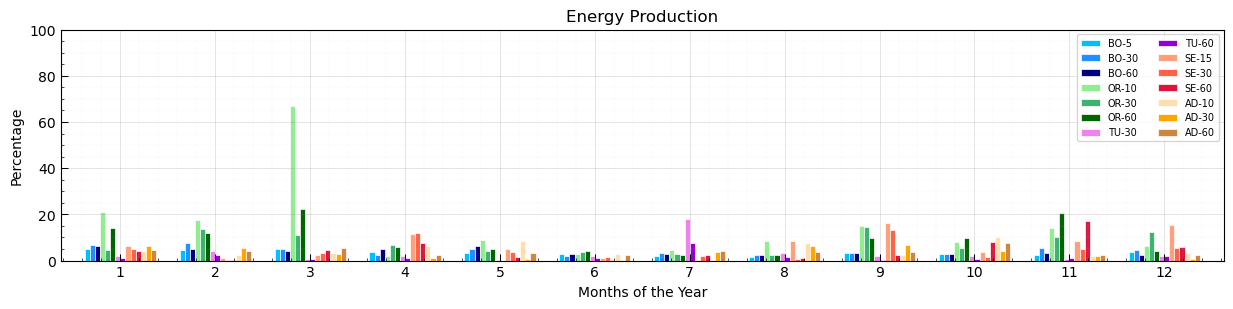

In [20]:
fig_title = 'Energy Production'
fig_ylabel = 'Percentage Error'

# pd.DataFrame
df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

for j in FILE:
    df.loc[j] = EM['BOOTSTRAP_MONTH'][j]['percentage_error'].values

df.index = labels

plt.figure()

df.T.plot(kind='bar',
            color=colors,
            edgecolor='white',
            linewidth=0.5,
            width=0.75,
            label=labels,
            figsize=(hor,ver))

plt.title(fig_title)
plt.ylabel('Percentage')
plt.xlabel('Months of the Year')
plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(0, 100)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
plt.tight_layout
plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
plt.savefig(f'../figs/fig19b.pdf', dpi=300, bbox_inches='tight')

In [21]:
df.astype(dtype=float).describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,6.492857,5.685714,9.835714,4.95000,3.942857,2.192857,3.985714,3.685714,6.878571,4.928571,6.735714,5.000000
std,5.124371,5.225214,17.288307,3.54981,2.783112,1.169131,4.426643,2.725057,5.700631,3.229296,6.424665,4.116384
min,1.000000,0.200000,0.600000,1.00000,0.000000,0.300000,0.100000,0.500000,0.200000,0.500000,0.500000,0.600000
25%,4.350000,2.300000,2.875000,2.22500,1.825000,1.250000,2.225000,1.850000,2.575000,2.725000,2.150000,2.325000
50%,4.900000,4.500000,4.300000,4.30000,3.950000,2.350000,2.750000,2.600000,3.550000,3.800000,4.100000,3.900000
75%,6.400000,6.875000,5.350000,6.77500,5.100000,2.875000,4.075000,5.450000,12.500000,7.850000,9.750000,5.750000
max,20.900000,17.500000,66.800000,11.80000,9.000000,4.200000,18.000000,8.400000,16.400000,10.400000,20.500000,15.400000


In [22]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,3.8,9.4,2.4,4.9,3.8
std,1.2,6.2,3.4,4.2,1.7
min,2.3,2.6,0.1,0.2,2.1
25%,2.8,4.8,1.1,1.8,2.5
50%,3.4,7.2,1.5,3.6,3.5
75%,4.8,14.1,2.1,6.5,4.4
max,6.4,22.4,12.8,13.4,7.7
